# World Polygon Geometry

### Installations

In [2]:
# !pip3 install --upgrade pip

In [3]:
# %pip install geopandas
# %pip install tabulate
# pip install contextily

### Imports

In [4]:
import sys

from tabulate import tabulate
import numpy as np
import pandas as pd

import geopandas

from shapely.geometry import box, Point

import folium

import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
%matplotlib inline

import contextily as cx

### Display Imports & Their Versions

In [5]:
headers = ["Software/Library", "Version"]

table_data = [
    ['Python', sys.version[0:6]],
    ['NumPy', np.__version__],
    ['Pandas', pd.__version__],
    ['GeoPandas', geopandas.__version__],
    ['Contextily', cx.__version__]
    ]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------------+-----------+
| Software/Library   | Version   |
+====================+===========+
| Python             | 3.11.4    |
+--------------------+-----------+
| NumPy              | 1.26.4    |
+--------------------+-----------+
| Pandas             | 1.5.3     |
+--------------------+-----------+
| GeoPandas          | 1.0.1     |
+--------------------+-----------+
| Contextily         | 1.6.2     |
+--------------------+-----------+


## Import Dataset

In [6]:
gdf = geopandas.read_file("countries.geojson")

gdf

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.8554, 20.46318 41.51509,..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.2455, 51.75744 24.29407,..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
...,...,...,...
175,PSE,West Bank,"POLYGON ((35.54566 32.39399, 35.54525 31.7825,..."
176,YEM,Yemen,"POLYGON ((53.10857 16.65105, 52.38521 16.38241..."
177,ZAF,South Africa,"POLYGON ((31.521 -29.25739, 31.32556 -29.40198..."
178,ZMB,Zambia,"POLYGON ((32.75938 -9.2306, 33.23139 -9.67672,..."


In [7]:
gdf.describe(include='all')

,id,name,geometry
count,180,180,180
unique,179,180,180
top,-99,Afghanistan,"POLYGON ((61.210817 35.650072, 62.230651 35.27..."
freq,2,1,1


### Return Information About Unqiue Values in Select Features

In [8]:
cols_to_check = [
    "id",
    "name"
]

for col in cols_to_check:
    u_vals = np.sort(gdf[col].unique())
    if len(u_vals) < 80:
        print(f"{col} ({len(u_vals)})\n{u_vals}\n")
    else:
        print(f"{col} ({len(u_vals)})\n")

id (179)

name (180)



## Data Visualizations

### Non-Interactive Data Visualization

In [9]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

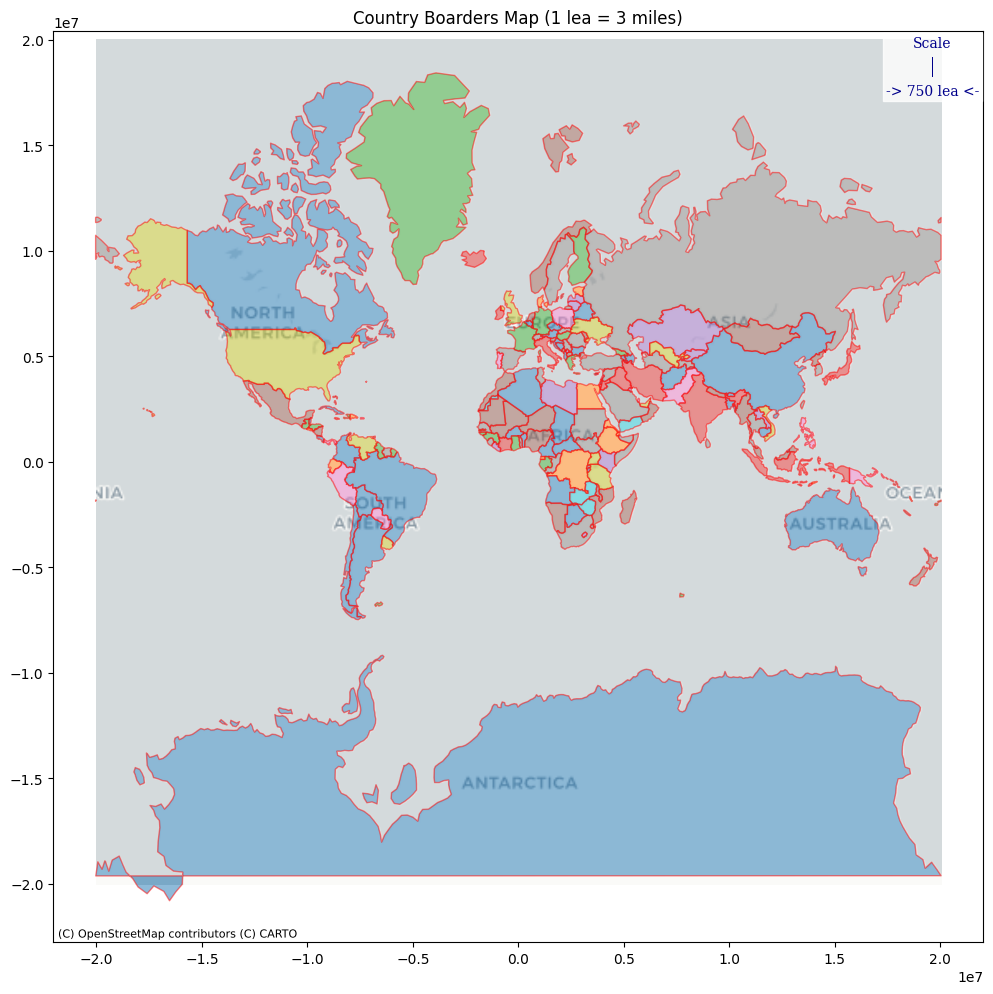

In [10]:
gdf_plot = gdf.to_crs(epsg=3857)

gdf_plot['category'] = gdf_plot['name'].str[0]

# ax = gdf_plot.plot(
#     column='category',
#     figsize=(24, 8),
#     alpha=0.5,
#     edgecolor="red"
# )

fig, ax = plt.subplots(figsize=(12, 12))
gdf_plot.plot(column='category', ax=ax, alpha=0.5, edgecolor="red")

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
# cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels)
# cx.add_basemap(ax, source=cx.providers.CartoDB.PositronOnlyLabels)

scale_bar_scaling = ScaleBar(
    dx=1,
    units="mi",
    dimension="imperial-length",
    label="Scale",
    length_fraction=0.06,
    height_fraction=0.0225,
    color="darkblue",
    font_properties={
        "family": "serif",
        "size": "medium",
    },
    box_alpha=0.8,
    scale_formatter=lambda value, unit: f"-> {value} {unit} <-",
)

ax.add_artist(scale_bar_scaling)

ax.set_title("Country Boarders Map (1 lea = 3 miles)")

plt.show()

### Interactive Data Visualization

In [11]:
gdf.explore(
    m = folium.Map(
        location=[0, 0], 
        tiles='OpenStreetMap', # CartoDB Voyager, OpenStreetMap
        zoom_start=2,
        prefer_canvas=True
        ),
    popup=True,
    highlight=True,
    legend=True,
    control_scale=True,
    style_kwds = {
        'stroke': True,
        'color': '#3271a5',
        'weight': 2,
        'opacity': 0.75,
        'fill': True,
        'fillColor': '#b8e2f4',
        'fillOpacity': 0.35
    },
    highlight_kwds ={
        'stroke': True,
        'color': 'green',
        'weight': 2,
        'opacity': 1,
        'fill': True,
        'fillColor': '#88e788',
        'fillOpacity': 0.35
    },
    tooltip_kwds = {
        'labels': True,
        'aliases': ['ID', 'Name']
    }
)

## Methods & Attributes

### General Methods & attributes

In [12]:
print("Geometry Type")

gdf_gt = gdf[['id', 'name']].copy()
gdf_gt['geom_type'] = gdf.geom_type

gdf_gt

Geometry Type


,id,name,geom_type
0,AFG,Afghanistan,Polygon
1,AGO,Angola,MultiPolygon
2,ALB,Albania,Polygon
3,ARE,United Arab Emirates,Polygon
4,ARG,Argentina,MultiPolygon
...,...,...,...
175,PSE,West Bank,Polygon
176,YEM,Yemen,Polygon
177,ZAF,South Africa,Polygon
178,ZMB,Zambia,Polygon


### Add Distance Features to Dataset

In [13]:
# Use the Hardard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [14]:
# Calculate distances
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point_projected)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point_projected)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point_projected)

gdf_projected

,id,name,geometry,dist_from_harvard,frechet_dist_from_harvard,hausdorff_dist_from_harvard
0,AFG,Afghanistan,"POLYGON ((6448971.271 16524323.051, 6583331.76...",1.135159e+07,1.261107e+07,1.261107e+07
1,AGO,Angola,"MULTIPOLYGON (((2680457.447 9311557.45, 270600...",1.072134e+07,1.269429e+07,1.269429e+07
2,ALB,Albania,"POLYGON ((2462922.125 14911703.116, 2463292.47...",7.657759e+06,7.895844e+06,7.895844e+06
3,ARE,United Arab Emirates,"POLYGON ((6609008.318 14201996.774, 6628312.75...",1.193919e+07,1.253104e+07,1.253104e+07
4,ARG,Argentina,"MULTIPOLYGON (((-3063079.444 1985784.844, -309...",1.166455e+07,1.581799e+07,1.581799e+07
...,...,...,...,...,...,...
175,PSE,West Bank,"POLYGON ((4232923.721 14326340.281, 4264057.63...",9.595997e+06,9.705329e+06,9.705329e+06
176,YEM,Yemen,"POLYGON ((7430495.323 13135594.508, 7332477.16...",1.178825e+07,1.305704e+07,1.305704e+07
177,ZAF,South Africa,"POLYGON ((3958310.951 6211063.328, 3931755.385...",1.300370e+07,1.437248e+07,1.437248e+07
178,ZMB,Zambia,"POLYGON ((4695535.332 8746064.656, 4751570.168...",1.220668e+07,1.339544e+07,1.339544e+07


### Retrieve Coordinates

In [15]:
gdf_get_coords = gdf.get_coordinates(include_z=True)
gdf_count_coords = gdf.count_coordinates()
gdf_count_geos = gdf.count_geometries()

print(f"GDF Coordinates:\n{gdf_get_coords}\n")
print(f"GDF Count Coordinates:\n{gdf_count_coords}\n")
print(f"GDF Count Geometries:\n{gdf_count_geos}")

GDF Coordinates:
             x          y   z
0    61.210817  35.650072 NaN
0    62.230651  35.270664 NaN
0    62.984662  35.404041 NaN
0    63.193538  35.857166 NaN
0    63.982896  36.007957 NaN
..         ...        ...  ..
179  32.772708 -19.715592 NaN
179  32.659743 -20.304290 NaN
179  32.508693 -20.395292 NaN
179  32.244988 -21.116489 NaN
179  31.191409 -22.251510 NaN

[10714 rows x 3 columns]

GDF Count Coordinates:
0       69
1       75
2       22
3       22
4      121
      ... 
175      9
176     44
177     94
178     61
179     37
Length: 180, dtype: int32

GDF Count Geometries:
0      1
1      2
2      1
3      1
4      2
      ..
175    1
176    1
177    1
178    1
179    1
Length: 180, dtype: int32


### Unary predicates

In [16]:
gdf_is_simple = gdf.is_simple
gdf_is_valid = gdf.is_valid
gdf_is_valid_reason = gdf.is_valid_reason()
gdf_has_z = gdf.has_z

gdf_is_simple_value_counts = gdf_is_simple.value_counts()
gdf_is_valid_value_counts = gdf_is_valid.value_counts()
gdf_is_valid_reason_value_counts = gdf_is_valid_reason.value_counts()
gdf_has_z_value_counts = gdf_has_z.value_counts()

print(f"is_simple:\n{gdf_is_simple_value_counts}\n")
print(f"is_valid:\n{gdf_is_valid_value_counts}\n")
print(f"is_valid_reason:\n{gdf_is_valid_reason_value_counts}\n")
print(f"has_z:\n{gdf_has_z_value_counts}\n")

is_simple:
True     179
False      1
dtype: int64

is_valid:
True     179
False      1
dtype: int64

is_valid_reason:
Valid Geometry                                           179
Self-intersection[-142.961052713438 -84.720614586011]      1
dtype: int64

has_z:
False    180
dtype: int64



### Binary predicates

In [17]:
points_to_use = geopandas.GeoSeries([
    Point(-95.67804, 39.04833), # Topeka, Kansas, USA
    Point(-114.0719, 51.0447),  # Calgary, Alberta, Canada
    Point(80.0, -10.0),         # Midpoint in the Indian Ocean
    Point(-19.0208, 64.9631),   # Center of Iceland
    Point(31.1342, 29.9792),    # Pyramids of Giza, Egypt
    Point(86.9250, 27.9881),    # Mount Everest, Nepal
    Point(149.1300, -35.2809)   # Canberra, Australia (Capital City)
])

# Create a GeoDataFrame from points
points_to_use = geopandas.GeoDataFrame(geometry=points_to_use)

# Ensure both GeoDataFrames have the same CRS
points_to_use = points_to_use.set_crs(gdf.crs, allow_override=True)

# Perform spatial join to find points within polygons
points_within = geopandas.sjoin(points_to_use, gdf, predicate='within', how='inner')

print("points_within")
print(points_within)

points_within
                     geometry  index_right   id                      name
0  POINT (-95.67804 39.04833)          170  USA  United States of America
1   POINT (-114.0719 51.0447)           28  CAN                    Canada
3    POINT (-19.0208 64.9631)           79  ISL                   Iceland
4     POINT (31.1342 29.9792)           48  EGY                     Egypt
5      POINT (86.925 27.9881)           31  CHN                     China
6     POINT (149.13 -35.2809)            8  AUS                 Australia


In [18]:
points_not_within = points_to_use[~points_to_use.index.isin(points_within.index)]

print("points_not_within")
print(points_not_within)

points_not_within
         geometry
2  POINT (80 -10)


In [19]:
latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)
ref_point_gs = geopandas.GeoSeries([ref_point], crs=gdf_projected.crs)

# List of distances to check
distances = [5, 10, 50, 100, 250, 500, 1000, 2500]

# Initialize a DataFrame to store results
results = gdf_projected.copy()

# Apply the dwithin function for each distance
for dist in distances:
    results[f'within_{dist}'] = gdf_projected.geometry.dwithin(ref_point_gs.geometry[0], distance=dist)

# Display the results
print(results)

      id                  name  \
0    AFG           Afghanistan   
1    AGO                Angola   
2    ALB               Albania   
3    ARE  United Arab Emirates   
4    ARG             Argentina   
..   ...                   ...   
175  PSE             West Bank   
176  YEM                 Yemen   
177  ZAF          South Africa   
178  ZMB                Zambia   
179  ZWE              Zimbabwe   

                                              geometry  dist_from_harvard  \
0    POLYGON ((6448971.271 16524323.051, 6583331.76...       1.135159e+07   
1    MULTIPOLYGON (((2680457.447 9311557.45, 270600...       1.072134e+07   
2    POLYGON ((2462922.125 14911703.116, 2463292.47...       7.657759e+06   
3    POLYGON ((6609008.318 14201996.774, 6628312.75...       1.193919e+07   
4    MULTIPOLYGON (((-3063079.444 1985784.844, -309...       1.166455e+07   
..                                                 ...                ...   
175  POLYGON ((4232923.721 14326340.281, 4264057.63.

### Set-Theoretic Methods

In [20]:
# Clip the GeoDataFrame by the specified rectangle
gdf_clip_by_rect = gdf.clip_by_rect(-75, -50, -25, 50)

# Remove rows with empty geometries
gdf_clip_by_rect = gdf_clip_by_rect[~gdf_clip_by_rect.geometry.is_empty]

# Display the resulting GeoDataFrame
gdf_clip_by_rect

4      POLYGON ((-73.41544 -49.31844, -72.64825 -48.8...
21     POLYGON ((-64.77997 32.3072, -64.78733 32.3039...
22     POLYGON ((-62.84647 -22.03498, -63.98684 -21.9...
23     POLYGON ((-57.62513 -30.2163, -56.2909 -28.852...
28     MULTIPOLYGON (((-63.6645 46.55001, -62.9393 46...
30     POLYGON ((-75 -50, -75 -47.57821, -74.12658 -4...
36     POLYGON ((-75 -0.13314, -75 11.00771, -74.9069...
38     POLYGON ((-75 19.9206, -75 20.6976, -74.9339 2...
45     POLYGON ((-71.71236 19.71446, -71.5873 19.8849...
68     POLYGON ((-52.55642 2.5047, -52.93966 2.12486,...
69     POLYGON ((-59.75828 8.36704, -59.10168 7.9992,...
72     POLYGON ((-73.18979 19.91568, -72.57967 19.871...
127    POLYGON ((-75 -15.41076, -75 -0.13314, -74.441...
131    POLYGON ((-66.28243 18.51476, -65.7713 18.4266...
134    POLYGON ((-62.68506 -22.24903, -62.29118 -21.0...
150    POLYGON ((-57.14744 5.97315, -55.94932 5.77288...
162    POLYGON ((-61.68 10.76, -61.105 10.89, -60.895...
169    POLYGON ((-57.62513 -30.

### Constructive methods and attributes

In [21]:
gdf_projected.boundary

0      LINESTRING (6448971.271 16524323.051, 6583331....
1      MULTILINESTRING ((2680457.447 9311557.45, 2706...
2      LINESTRING (2462922.125 14911703.116, 2463292....
3      LINESTRING (6609008.318 14201996.774, 6628312....
4      MULTILINESTRING ((-3063079.444 1985784.844, -3...
                             ...                        
175    LINESTRING (4232923.721 14326340.281, 4264057....
176    LINESTRING (7430495.323 13135594.508, 7332477....
177    MULTILINESTRING ((3958310.951 6211063.328, 393...
178    LINESTRING (4695535.332 8746064.656, 4751570.1...
179    LINESTRING (4178307.175 7085893.812, 4119427.3...
Length: 180, dtype: geometry

In [22]:
gdf_projected.buffer(distance=125)

0      POLYGON ((6448868.549 16524251.825, 6448861.90...
1      MULTIPOLYGON (((2680462.127 9311682.362, 26804...
2      POLYGON ((2463036.176 14911754.277, 2463040.83...
3      POLYGON ((6608910.762 14201918.622, 6608903.77...
4      MULTIPOLYGON (((-3062971.12 1985847.221, -3062...
                             ...                        
175    POLYGON ((4232926.448 14326465.251, 4232938.37...
176    POLYGON ((7430579.266 13135687.128, 7430587.78...
177    POLYGON ((3958356.749 6210947.02, 3931815.416 ...
178    POLYGON ((4695606.067 8746167.717, 4695615.314...
179    POLYGON ((4178378.275 7085791.003, 4178368.116...
Length: 180, dtype: geometry

In [23]:
gdf_projected.centroid

0      POINT (7100944.665 16868993.954)
1       POINT (2782088.469 8557751.178)
2      POINT (2439250.161 14817463.529)
3      POINT (6993951.528 14364885.446)
4      POINT (-5457539.601 4008873.497)
                     ...               
175    POINT (4228065.617 14260028.998)
176    POINT (6634399.198 12713454.189)
177      POINT (3334406.984 6460259.26)
178     POINT (4012621.789 8299047.834)
179     POINT (4117442.836 7547062.084)
Length: 180, dtype: geometry

In [24]:
gdf.convex_hull

0      POLYGON ((62.54986 29.31857, 60.87425 29.82924...
1      POLYGON ((21.37718 -17.93064, 18.95619 -17.789...
2      POLYGON ((20.15002 39.625, 19.98 39.69499, 19....
3      POLYGON ((55.0068 22.49695, 52.00073 23.00115,...
4      POLYGON ((-66.45 -55.25, -68.63335 -54.8695, -...
                             ...                        
175    POLYGON ((34.92741 31.35344, 34.97464 31.86658...
176    POLYGON ((44.17511 12.58595, 43.48296 12.6368,...
177    POLYGON ((19.6164 -34.81917, 18.85532 -34.4443...
178    POLYGON ((26.70677 -17.96123, 23.21505 -17.523...
179    POLYGON ((30.32288 -22.27161, 29.43219 -22.091...
Length: 180, dtype: geometry

In [25]:
gdf.envelope

0      POLYGON ((60.52843 29.31857, 75.15803 29.31857...
1      POLYGON ((11.6401 -17.93064, 24.0799 -17.93064...
2      POLYGON ((19.30449 39.625, 21.02004 39.625, 21...
3      POLYGON ((51.57952 22.49695, 56.39685 22.49695...
4      POLYGON ((-73.41544 -55.25, -53.62835 -55.25, ...
                             ...                        
175    POLYGON ((34.92741 31.35344, 35.54566 31.35344...
176    POLYGON ((42.60487 12.58595, 53.10857 12.58595...
177    POLYGON ((16.34498 -34.81917, 32.83012 -34.819...
178    POLYGON ((21.88784 -17.96123, 33.48569 -17.961...
179    POLYGON ((25.26423 -22.27161, 32.84986 -22.271...
Length: 180, dtype: geometry

In [26]:
gdf.extract_unique_points()

0      MULTIPOINT (61.21082 35.65007, 62.23065 35.270...
1      MULTIPOINT (16.32653 -5.87747, 16.57318 -6.622...
2      MULTIPOINT (20.59025 41.8554, 20.46318 41.5150...
3      MULTIPOINT (51.57952 24.2455, 51.75744 24.2940...
4      MULTIPOINT (-65.5 -55.2, -66.45 -55.25, -66.95...
                             ...                        
175    MULTIPOINT (35.54566 32.39399, 35.54525 31.782...
176    MULTIPOINT (53.10857 16.65105, 52.38521 16.382...
177    MULTIPOINT (31.521 -29.25739, 31.32556 -29.401...
178    MULTIPOINT (32.75938 -9.2306, 33.23139 -9.6767...
179    MULTIPOINT (31.19141 -22.25151, 30.65986 -22.1...
Length: 180, dtype: geometry

In [27]:
gdf.force_2d()

0      POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1      MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...
2      POLYGON ((20.59025 41.8554, 20.46318 41.51509,...
3      POLYGON ((51.57952 24.2455, 51.75744 24.29407,...
4      MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6...
                             ...                        
175    POLYGON ((35.54566 32.39399, 35.54525 31.7825,...
176    POLYGON ((53.10857 16.65105, 52.38521 16.38241...
177    POLYGON ((31.521 -29.25739, 31.32556 -29.40198...
178    POLYGON ((32.75938 -9.2306, 33.23139 -9.67672,...
179    POLYGON ((31.19141 -22.25151, 30.65986 -22.151...
Length: 180, dtype: geometry

In [28]:
gdf.minimum_bounding_circle()

0      POLYGON ((76.03754 33.48114, 75.88341 31.91624...
1      POLYGON ((26.04669 -11.21035, 25.88427 -12.859...
2      POLYGON ((21.48945 41.15662, 21.45975 40.85513...
3      POLYGON ((56.58011 24.52831, 56.53122 24.03194...
4      POLYGON ((-47.96133 -38.54968, -48.28388 -41.8...
                             ...                        
175    POLYGON ((35.76931 31.9209, 35.75755 31.80147,...
176    POLYGON ((53.20881 15.62305, 53.10656 14.5849,...
177    POLYGON ((33.523 -28.19402, 33.35509 -29.89883...
178    POLYGON ((34.07272 -12.87852, 33.94757 -14.149...
179    POLYGON ((33.33741 -18.65381, 33.25885 -19.451...
Length: 180, dtype: geometry

In [29]:
gdf.minimum_clearance()

0      0.212854
1      0.166741
2      0.172035
3      0.167246
4      0.238513
         ...   
175    0.217967
176    0.191897
177    0.003076
178    0.083331
179    0.176345
Length: 180, dtype: float64

In [30]:
gdf.minimum_rotated_rectangle()

0      POLYGON ((61.75185 27.85033, 76.39483 34.34417...
1      POLYGON ((24.54867 -5.2427, 11.95845 -4.39334,...
2      POLYGON ((18.66517 42.30042, 19.69212 39.45948...
3      POLYGON ((52.59553 21.52522, 57.20134 23.38133...
4      POLYGON ((-67.2685 -20.64362, -77.19032 -52.17...
                             ...                        
175    POLYGON ((35.36699 31.21528, 35.7273 32.36174,...
176    POLYGON ((53.51408 15.34373, 51.99194 20.25099...
177    POLYGON ((18.4305 -36.00752, 34.18921 -31.5847...
178    POLYGON ((31.07493 -6.32223, 20.13562 -13.3546...
179    POLYGON ((28.20051 -23.72274, 34.71842 -20.516...
Length: 180, dtype: geometry

In [31]:
gdf.normalize()

0      POLYGON ((60.52843 33.67645, 60.80319 34.4041,...
1      MULTIPOLYGON (((11.6401 -16.67314, 11.77854 -1...
2      POLYGON ((19.30449 42.19574, 19.73805 42.68825...
3      POLYGON ((51.57952 24.2455, 51.75744 24.29407,...
4      MULTIPOLYGON (((-73.41544 -49.31844, -72.64825...
                             ...                        
175    POLYGON ((34.92741 31.35344, 34.97051 31.61678...
176    POLYGON ((42.60487 15.21334, 42.80502 15.26196...
177    POLYGON ((16.34498 -28.5767, 16.82402 -28.0821...
178    POLYGON ((21.88784 -16.08031, 21.93389 -12.898...
179    POLYGON ((25.26423 -17.73654, 26.38194 -17.846...
Length: 180, dtype: geometry

In [32]:
translated_gdf = gdf.translate(xoff=1, yoff=2)

translated_gdf.explore()

### Spatial index

In [33]:
gdf.sindex.query(box(-50, -25, 50, -75), predicate='contains')

array([ 97, 154])

### General Functions & Attributes (GeoDataFrame)

In [34]:
gdf.active_geometry_name

'geometry'

### Iterate Through All Rows

In [35]:
for index, row in gdf.iterrows():
    print("All Data:", row)

All Data: id                                                        AFG
name                                              Afghanistan
geometry    POLYGON ((61.210817 35.650072, 62.230651 35.27...
Name: 0, dtype: object
All Data: id                                                        AGO
name                                                   Angola
geometry    MULTIPOLYGON (((16.326528 -5.87747, 16.57318 -...
Name: 1, dtype: object
All Data: id                                                        ALB
name                                                  Albania
geometry    POLYGON ((20.590247 41.855404, 20.463175 41.51...
Name: 2, dtype: object
All Data: id                                                        ARE
name                                     United Arab Emirates
geometry    POLYGON ((51.579519 24.245497, 51.757441 24.29...
Name: 3, dtype: object
All Data: id                                                        ARG
name                                                

### Iterate Through All Features in Dataset

In [36]:
for feature in gdf.iterfeatures():
    print(feature)

{'id': '0', 'type': 'Feature', 'properties': {'id': 'AFG', 'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': (((61.210817, 35.650072), (62.230651, 35.270664), (62.984662, 35.404041), (63.193538, 35.857166), (63.982896, 36.007957), (64.546479, 36.312073), (64.746105, 37.111818), (65.588948, 37.305217), (65.745631, 37.661164), (66.217385, 37.39379), (66.518607, 37.362784), (67.075782, 37.356144), (67.83, 37.144994), (68.135562, 37.023115), (68.859446, 37.344336), (69.196273, 37.151144), (69.518785, 37.608997), (70.116578, 37.588223), (70.270574, 37.735165), (70.376304, 38.138396), (70.806821, 38.486282), (71.348131, 38.258905), (71.239404, 37.953265), (71.541918, 37.905774), (71.448693, 37.065645), (71.844638, 36.738171), (72.193041, 36.948288), (72.63689, 37.047558), (73.260056, 37.495257), (73.948696, 37.421566), (74.980002, 37.41999), (75.158028, 37.133031), (74.575893, 37.020841), (74.067552, 36.836176), (72.920025, 36.720007), (71.846292, 36.509942), (71.262348,

### Interface

In [37]:
gdf.__geo_interface__

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'id': 'AFG', 'name': 'Afghanistan'},
   'geometry': {'type': 'Polygon',
    'coordinates': (((61.210817, 35.650072),
      (62.230651, 35.270664),
      (62.984662, 35.404041),
      (63.193538, 35.857166),
      (63.982896, 36.007957),
      (64.546479, 36.312073),
      (64.746105, 37.111818),
      (65.588948, 37.305217),
      (65.745631, 37.661164),
      (66.217385, 37.39379),
      (66.518607, 37.362784),
      (67.075782, 37.356144),
      (67.83, 37.144994),
      (68.135562, 37.023115),
      (68.859446, 37.344336),
      (69.196273, 37.151144),
      (69.518785, 37.608997),
      (70.116578, 37.588223),
      (70.270574, 37.735165),
      (70.376304, 38.138396),
      (70.806821, 38.486282),
      (71.348131, 38.258905),
      (71.239404, 37.953265),
      (71.541918, 37.905774),
      (71.448693, 37.065645),
      (71.844638, 36.738171),
      (72.193041, 36.948288),
      (72.63

## Save Cleaned Dataset to File

In [39]:
new_file_name_and_path = 'cleaned_gdf_file.geojson'

gdf.to_file(new_file_name_and_path, driver="geojson")

### Resources Used (links to libraries used in this project)

- GeoPandas: https://geopandas.org/en/stable/